# <u>**Part 6**

In [13]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **Exercise 61**

Load the *'61.csv'* file into the DataFrame. The distribution of the variables form this file is as follows:

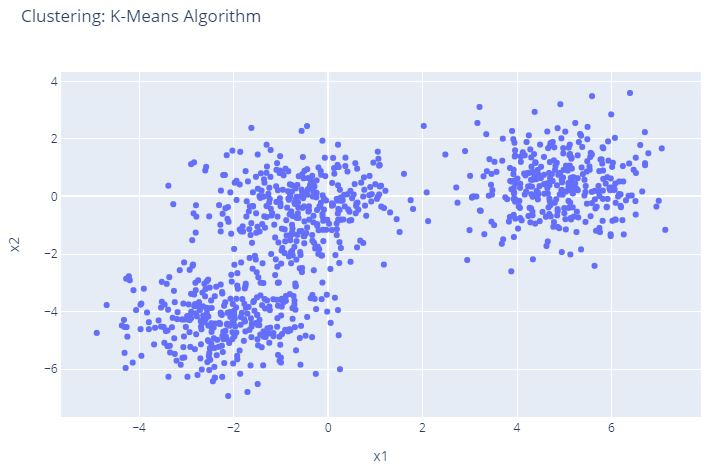

Using the KMeans class (set random_state=42) from the scikit-learn, create a list of *WCSS* (*Within-Cluster Sum-of-Squared*) values for the number of clusters from 2 to 9 inclusive. Round WCSS values to two decimal places and print to the console.

In [ ]:
np.random.seed(42)

In [ ]:
df=pd.read_csv('61.csv')

In [ ]:
wcss=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(round(kmeans.inertia_, 2))

print(wcss)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[23414.04, 7734.89, 4282.14, 3851.55, 3442.66, 3049.74, 2716.87, 2472.8]


### **Exercise 62**

Using the KMeans class from the scikit-learn, a list of WCSS (Within-Cluster Sum-of-Squared) values was calculated. Using the elbow method, select the appropriate number of clusters and print the result to the console.

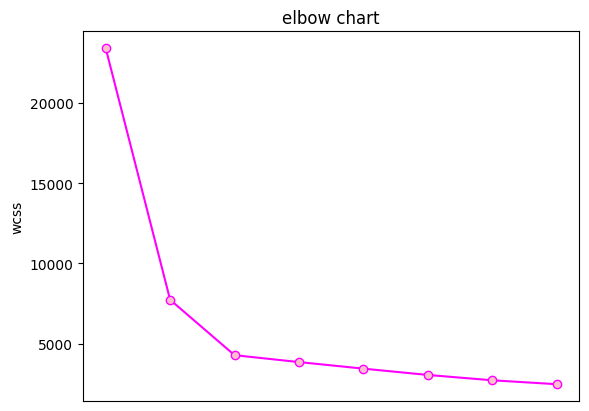

In [ ]:
plt.plot(wcss, color='magenta', marker='o',mfc='pink' )
plt.xticks(range(len(wcss)+1, 1)) 

plt.ylabel('wcss') 
plt.title("elbow chart") 
plt.show()

The appropriate number of clusters is three.

### **Exercise 63**

Load the 63.csv file into the DataFrame and assign to df variable. The distribution of the variables form this file is as follows:

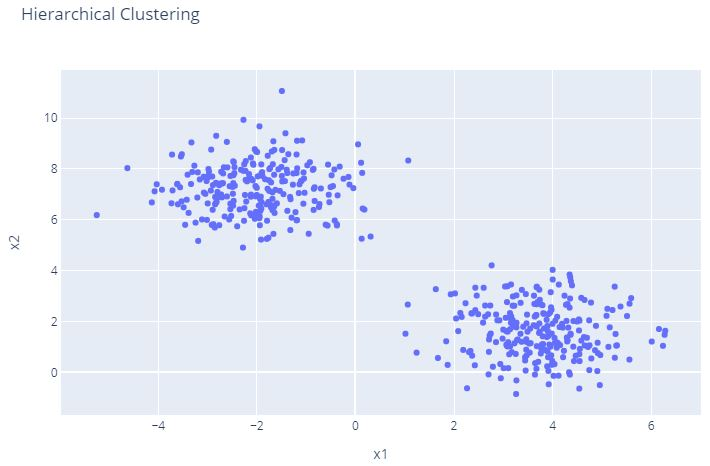

Using the AgglomerativeClustering class from the scikit-learn, create a model to split given dataset into two clusters. Make a prediction based on this model and assign a new column 'cluster' which stores the cluster number for each sample in the df DataFrame.

In response, print the first ten rows of the df DataFrame to the console

In [ ]:
df = pd.read_csv('63.csv')
 
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit_predict(df)
 
df = pd.DataFrame(df, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_

In [ ]:
df.head(10)

,x1,x2,cluster
0,-2.486532,7.025770,0
1,-3.522549,8.578303,0
2,-2.982040,7.998514,0
3,-2.135276,6.255888,0
4,2.762504,4.210918,1
5,-3.541472,8.489106,0
6,1.240259,0.781640,1
7,0.053390,8.966770,0
8,-0.827918,6.742253,0
9,3.291716,1.296751,1


### **Exercise 64**

Using the *AgglomerativeClustering* class from the scikit-learn, create a model to split given dataset into two clusters (use the *Manhattan* metric). Make a prediction based on this model and assign a new column 'cluster' which stores the cluster number for each sample in the df DataFrame.

In response, print the first ten rows of the df DataFrame to the console.

In [ ]:
df = pd.read_csv('63.csv')
 
cluster = AgglomerativeClustering(
    n_clusters=2, 
    metric='manhattan', 
    linkage='complete'
)
cluster.fit_predict(df)
 
df = pd.DataFrame(df, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_

In [ ]:
df.head(10)

,x1,x2,cluster
0,-2.486532,7.025770,0
1,-3.522549,8.578303,0
2,-2.982040,7.998514,0
3,-2.135276,6.255888,0
4,2.762504,4.210918,1
5,-3.541472,8.489106,0
6,1.240259,0.781640,1
7,0.053390,8.966770,0
8,-0.827918,6.742253,0
9,3.291716,1.296751,1


### **Exercise 65**

Load the 65.csv file into the DataFrame and assign to df variable. The distribution of the variables form this file is as follows

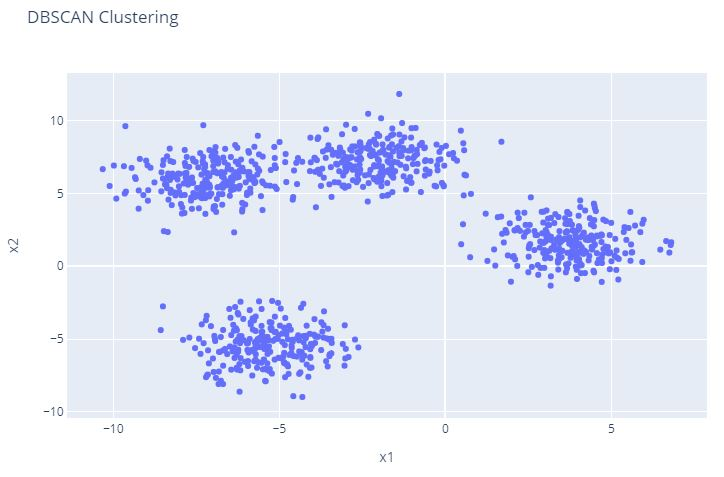

Using the DBSCAN class from the scikit-learn, create a model to split given dataset into clusters. Set the following arguemnts:

* ```eps=0.6```
*```min_samples = 7```

Make a prediction based on this model and assign a new column 'cluster' which stores the cluster number for each sample in the df DataFrame.

In response, print the first ten rows of the df DataFrame.

In [ ]:
df = pd.read_csv('65.csv')
cluster = DBSCAN(eps=0.6, min_samples=7)
cluster.fit(df)
df['cluster'] = cluster.labels_
df.head(10)

,x1,x2,cluster
0,-6.730717,5.548132,0
1,-4.613187,-5.144937,1
2,-4.833709,-5.412881,1
3,3.160670,0.558723,2
4,3.400393,-0.225236,2
5,-5.435286,-5.181777,1
6,4.168140,2.311239,2
7,-4.404109,-5.088302,1
8,-5.235005,-3.867119,1
9,5.159714,0.598213,2


### **Exercise 66**

Using the DBSCAN class from the scikit-learn, create a model to split given dataset into clusters. Set the following arguments

* ```eps=0.6```
*```min_samples = 7```

Make a prediction based on this model and assign a new column 'cluster' which stores the cluster number for each sample in the df DataFrame. In response, print the *distribution* of the samples in each cluster.

In [ ]:
df = pd.read_csv('65.csv')
cluster = DBSCAN(eps=0.6, min_samples=7)
cluster.fit(df)
df['cluster'] = cluster.labels_
df.cluster.value_counts()

 0    449
 1    232
 2    231
-1     88
Name: cluster, dtype: int64

### **Exercise 67**

Load the *pca.csv* file into the df DataFrame. This file contains three explanatory variables *var1*, *var2*, *var3* and the class variable. Extract the following variables: *var1*, *var2*, *var3* and assign to the X variable, also extract class column and assign to the y variable.

Using the *StandardScaler* class, standardize *X* and assign to the *X_std* variable.

In response, print the first ten rows of the *X_std* array to the console.



In [3]:
df = pd.read_csv('pca.csv')
 
X = df[['var1', 'var2', 'var3']]
X

,var1,var2,var3
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [4]:
y = df[['class']]
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[:10]

array([[-0.90068117, -1.34022653, -1.3154443 ],
       [-1.14301691, -1.34022653, -1.3154443 ],
       [-1.38535265, -1.39706395, -1.3154443 ],
       [-1.50652052, -1.2833891 , -1.3154443 ],
       [-1.02184904, -1.34022653, -1.3154443 ],
       [-0.53717756, -1.16971425, -1.05217993],
       [-1.50652052, -1.34022653, -1.18381211],
       [-1.02184904, -1.2833891 , -1.3154443 ],
       [-1.74885626, -1.34022653, -1.3154443 ],
       [-1.14301691, -1.2833891 , -1.44707648]])

### **Exercise 68**

The *pca.csv* file was loaded into the df DataFrame. Using the StandardScaler class, the variables in the *X* were standardized and assigned to the *X_std*.

Implement the PCA algorithm using the X_std array. Reduce the result to the two principal components and assign it to the X_pca variable.

In response, print the first ten rows of the X_pca array

**steps**
* compute covariance matrix of X_std array
* find the eigenvectors and their corresponding eigenvalues for this covariance matrix
* sort eigenvectors by decreasing eigenvalues
* determine the number of components (in this case 2).
* create matrix W from selected vectors (columns as eigenvectors).
* multiply X_std by W and assign to the X_pca variable


In [7]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(X_std, rowvar=False))
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)
 
W = np.hstack((eig_pairs[0][1].reshape(3, 1), eig_pairs[1][1].reshape(3, 1)))
X_pca = X_std.dot(W)
X_pca[:10]

array([[-2.06036006,  0.2986744 ],
       [-2.1959812 ,  0.10172707],
       [-2.36522102, -0.08074913],
       [-2.36579421, -0.20816508],
       [-2.12817063,  0.20020073],
       [-1.60325585,  0.4127035 ],
       [-2.32300467, -0.26268319],
       [-2.09455194,  0.1857296 ],
       [-2.53503403, -0.39064128],
       [-2.23877073,  0.15624518]])

### **Exercise 69**

The PCA algorithm was implemented using the *X_std* array and the result was assigned to the *X_pca* variable.

Create a DataFrame called *df_pca* using the *X_pca* array and the y variable and print the first ten rows of this object to the console.

In [8]:
df_pca = pd.DataFrame(data=X_pca, columns=['pca_1', 'pca_2'])
df_pca['class'] = df['class']
df_pca['pca_2'] = - df_pca['pca_2']
df_pca.head(10)

,pca_1,pca_2,class
0,-2.060360,-0.298674,0
1,-2.195981,-0.101727,0
2,-2.365221,0.080749,0
3,-2.365794,0.208165,0
4,-2.128171,-0.200201,0
5,-1.603256,-0.412703,0
6,-2.323005,0.262683,0
7,-2.094552,-0.185730,0
8,-2.535034,0.390641,0
9,-2.238771,-0.156245,0


### **Exercise 70**

The pca.csv file was loaded into the df DataFrame. Using the StandardScaler class, the variables in the X object were standardized and assigned to the X_std variable.

Using the PCA class from the scikit-learn, perform the PCA analysis with two components using the X_std array and assign it to the df_pca variable. In resposne, print the first ten rows of this object (also add the 'class' column) as shown previous.

In [9]:
df = pd.read_csv('pca.csv')
df.head(5)

,var1,var2,var3,class
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [10]:
X = df[['var1', 'var2', 'var3']]
y = df[['class']]

In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
df_pca = pd.DataFrame(data=X_pca, columns=['pca_1', 'pca_2'])
df_pca['class'] = df['class']
df_pca.head(10)

,pca_1,pca_2,class
0,-2.060360,-0.298674,0
1,-2.195981,-0.101727,0
2,-2.365221,0.080749,0
3,-2.365794,0.208165,0
4,-2.128171,-0.200201,0
5,-1.603256,-0.412703,0
6,-2.323005,0.262683,0
7,-2.094552,-0.185730,0
8,-2.535034,0.390641,0
9,-2.238771,-0.156245,0
